In [2]:
%conda install shapely

^C


In [13]:
from collections.abc import Iterable

In [18]:
import json, csv, os
from shapely.geometry import Point, Polygon
from itertools import combinations
from pprint import pprint
import matplotlib.pyplot as plt
import logging
import tracemalloc
import operator
import shutil
import pandas as pd
import json
import pprint

logging.basicConfig(filename='logfile.log',level=logging.DEBUG)


dataOrigin = "replayFiles"



botLane = Polygon([(-4336,-5584),(-3456,-5665),(-3504,-5184),(-1920,-4992),(-1232,-5488),(-592,-5760),(48,-5472),(1600,-5443),(2320,-5104),(5136,-5376),(5562,-4755),(5072,-3088),(5072,-2592),(5168,-1872),(5357,-960),(5153,-464),(5248,320),(5745,720),(5776,1088),(5482,1501),(5480,3536),(7584,3696),(7872,-5008),(7504,-7184),(2816,-7216),(-4672,-7248)])
midLane = Polygon([(-5412,-4169),(-5012,-3225),(-4596,-2153),(-3636,-2025),(-2836,-1305),(-2212,-697),(-1716,695),(-1028,1175),(188,1074),(764,919),(1308,1335),(1644,2711),(1948,3511),(3452,3815),(4284,4455),(4956,3767),(4332,2919),(4332,2295),(3804,1303),(3004,919),(1916,311),(1852,-553),(460,-1593),(-516,-2041),(-1268,-2185),(-2100,-3129),(-2308,-3833),(-3684,-4393),(-4724,-4857)])
topLane = Polygon([(4400,7744),(4048,5184),(2832,5328),(2816,4800),(1312,5232),(-1344,5616),(-2688,5600),(-5376,4928),(-5920,4096),(-5056,3040),(-5072,2576),(-5232,2208),(-4992,1024),(-5454,576),(-5424,176),(-5216,-96),(-5232,-1008),(-5552,-1440),(-4992,-2160),(-5600,-2928),(-6091,-2944),(-6128,-3920),(-8000,-3968),(-7840,7936)])
radiantBase = Polygon([(-3568,-8176),(-8192,-8224),(-8224,-2912),(-5696,-2944),(-5360,-3184),(-4864,-3248),(-4640,-3424),(-3728,-4368),(-3696,-4880),(-3456,-5168),(-3440,-5616)])
direBase = Polygon([(8199,7856),(8135,2400),(5360,2416),(5184,2592),(4592,2672),(3168,4048),(3136,4352),(2903,4560),(2935,7984)])
radiantTopJungle = Polygon([(-4256,976),(-3613,1490),(-2653,658),(-2656,-160),(-2224,-480),(-2240, -880),(-2864, -1152),(-3629, -1918),(-4784,-2160),(-5424,-1472),(-5376, 992)])
radiantBotJungle = Polygon([(544,-1552),(656,-2736),(1712,-2784),(1920,-3072),(2990,-4246),(4896,-3888),(5056,-4720),(3952,-5200),(3408,-5120),(2496,-4720),(1582,-5462),(-386,-5590),(-1042,-5558),(-2080,-4736),(-2320,-3856),(-2178,-3206),(-1282,-2182),(-544,-2112),(-64,-1552)])
direTopJungle = Polygon([(-1456,4704),(-1056,5216),(1408,5104),(1392,4752),(1568,4704),(1568,3856),(1888,3712),(1872,3408),(1148,2615),(1116,1927),(204,1607),(-528,1712),(-656,1872),(-1072,1968),(-1120,2288),(-1760,3216),(-2656,3232),(-2788,4071),(-3380,4055),(-3508,3287),(-5348,3271),(-5872,4336),(-5392,5088),(-3312,5520),(-2160,5520)])
direBotJungle = Polygon([(3824,1056),(4048,1296),(4176,1376),(5472,1440),(5776,1104),(5712,720),(5184,256),(5152,-368),(5376,-496),(5456,-880),(5648,-976),(5632,-1296),(5312,-1376),(4501,-1094),(3872,-1088),(3712,-1504),(3536,-1648),(3280,-1664),(3040,-1136),(3040,-672),(2560,-400),(1824,-512),(1952,352),(3360,1072)])
roshanPit = Polygon([(-2384,2512),(-2032,2192),(-960,1932),(-1040,1216),(-1408,1008),(-1712,716),(-2528,684),(-2528,1296),(-2992,1824),(-2964,2224)])

map_segments = [botLane,midLane,topLane,radiantBase,direBase,radiantTopJungle,radiantBotJungle,roshanPit]

In [6]:
def getCurrentLane(position):
    if(topLane.contains(position)):
        return "TOP"
    elif(midLane.contains(position)):
        return "MID"
    elif(botLane.contains(position)):
        return "BOT"
    elif(direBase.contains(position)):
        return "DIRE_BASE"
    elif(radiantBase.contains(position)):
        return "RADIANT_BASE"
    # elif(radiantTopJungle.contains(pos) or radiantBotJungle.contains(pos) or direTopJungle.contains(pos) or direBotJungle.contains(pos)):
    #     valuesToSave[savingRef] = "JUNGLE"
    else:
        return "JUNGLE"

In [9]:
getCurrentLane(Point(6802.21875,6069.65625))

'DIRE_BASE'

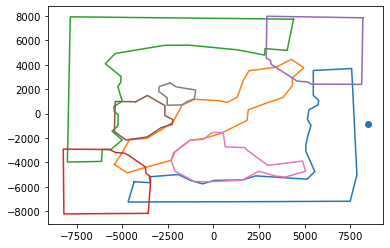

In [21]:
for segment in map_segments:
    plt.plot(*segment.exterior.xy)

plt.scatter(8461.0,-873.0)

In [11]:
f = open('5492147125.json')
frames= json.load(f)
frames = frames["frames"]

In [12]:
entities = [x["Entities"] for x in frames]

In [14]:
def clean_dict(x):
    for k,v in x.items():
        if isinstance(v,Iterable):
            x[k] = "".join(map(str,x[k]))

In [15]:
playerEntities = []
HeroEntities = []
MapEntities = []

In [16]:
for framenum,frame in enumerate(entities):
    print(f"######FRAME NUMBER {framenum}##########")
    for ID,entity in frame.items():
        if entity["ENTITY_TYPE"] == "PlayerEntity" :
            dct = {k:[v] for k,v in entity.items()}
            dct["Frame"] = framenum
            clean_dict(dct)
            playerEntities.append(dct)


        elif entity["ENTITY_TYPE"] == "HeroEntity":
            dct = {k:[v] for k,v in entity.items()}
            dct["Frame"] = framenum
            clean_dict(dct)
            HeroEntities.append(dct)

        elif entity["ENTITY_TYPE"]== "Dota2MapEntity":
            dct = {k:[v] for k,v in entity.items()}
            dct["Frame"] = framenum
            clean_dict(dct)
            MapEntities.append(dct)

######FRAME NUMBER 0##########
######FRAME NUMBER 1##########
######FRAME NUMBER 2##########
######FRAME NUMBER 3##########
######FRAME NUMBER 4##########
######FRAME NUMBER 5##########
######FRAME NUMBER 6##########
######FRAME NUMBER 7##########
######FRAME NUMBER 8##########
######FRAME NUMBER 9##########
######FRAME NUMBER 10##########
######FRAME NUMBER 11##########
######FRAME NUMBER 12##########
######FRAME NUMBER 13##########
######FRAME NUMBER 14##########
######FRAME NUMBER 15##########
######FRAME NUMBER 16##########
######FRAME NUMBER 17##########
######FRAME NUMBER 18##########
######FRAME NUMBER 19##########
######FRAME NUMBER 20##########
######FRAME NUMBER 21##########
######FRAME NUMBER 22##########
######FRAME NUMBER 23##########
######FRAME NUMBER 24##########
######FRAME NUMBER 25##########
######FRAME NUMBER 26##########
######FRAME NUMBER 27##########
######FRAME NUMBER 28##########
######FRAME NUMBER 29##########
######FRAME NUMBER 30##########
######FRAME NUMBER

In [19]:
player_df = pd.DataFrame(playerEntities)
player_df.reset_index(inplace=True, drop=True)
player_df = player_df.set_index("Frame").bfill()
player_df["PLAYER"] = player_df["UID"]

In [41]:
player_df

,UID,ENTITY_TYPE,ID,NAME,TEAM,TIMEINMIDLANE,TIMEINSAFELANE,TIMEINOFFLANE,TIMEROAMING,XPPRIORITY,...,XPM_NUMBER_OF_HISTORIC_MATCHES,XP,XP_PERCENTILE,XP_NUMBER_OF_HISTORIC_MATCHES,XCAMERA,YCAMERA,CAMERA_ZOOM_LEVEL,XCURSOR,YCURSOR,PLAYER
Frame,,,,,,,,,,,,,,,,,,,,,
0,268435466,PlayerEntity,PLAYER0,???,268435476,None,None,None,None,None,...,None,0.0,None,None,0.0,-599.0,0.5,175.0,266.0,268435466
0,268435467,PlayerEntity,PLAYER1,Ryoya,268435476,None,None,None,None,None,...,None,0.0,None,None,0.0,-599.0,0.5,220.0,311.0,268435467
0,268435468,PlayerEntity,PLAYER2,Better days,268435476,None,None,None,None,None,...,None,0.0,None,None,466.0,-999.0,0.5,333.0,210.0,268435468
0,268435469,PlayerEntity,PLAYER3,zzz,268435476,None,None,None,None,None,...,None,0.0,None,None,0.0,-599.0,0.5,198.0,233.0,268435469
0,268435470,PlayerEntity,PLAYER4,mode:zai,268435476,None,None,None,None,None,...,None,0.0,None,None,0.0,-1225.0,0.5,368.0,277.0,268435470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,268435471,PlayerEntity,PLAYER5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-6861.0,-3721.0,NaN,236.0,87.0,268435471
3382,268435472,PlayerEntity,PLAYER6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-6861.0,-3721.0,NaN,198.0,240.0,268435472
3382,268435473,PlayerEntity,PLAYER7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-6861.0,-3721.0,NaN,198.0,240.0,268435473


In [20]:
hero_df = pd.DataFrame(HeroEntities)
hero_df.reset_index(inplace=True, drop=True)
hero_df = hero_df.set_index("Frame").bfill()

In [21]:
hero_df

,UID,ENTITY_TYPE,ID,NAME,PLAYER,BUYBACK_COOLDOWN,HEALTH,HEALTH_PERCENT,ALIVE,VISIBLE_BY_OTHER_TEAM,...,BASE_AGILITY,TOTAL_AGILITY,BASE_INTELLECT,TOTAL_INTELLECT,MOVEMENT_SPEED,DAMAGE_MIN,DAMAGE_MAX,DAMAGE_BONUS,PHYSICAL_ARMOUR,MAGIC_RESISTENCE
Frame,,,,,,,,,,,,,,,,,,,,,
872,268435723,HeroEntity,HERO0,npc_dota_hero_arc_warden,268435466,0.0,740.0,100.0,False,False,...,15.0,20.0,24.0,26.0,285,51,61,2,-2.0,25.0
872,268435724,HeroEntity,HERO1,npc_dota_hero_kunkka,268435467,0.0,800.0,100.0,False,False,...,14.0,17.0,18.0,21.0,300,56,66,2,1.0,25.0
872,268435725,HeroEntity,HERO2,npc_dota_hero_enchantress,268435468,0.0,560.0,100.0,False,False,...,19.0,20.0,22.0,23.0,320,46,56,2,1.0,25.0
872,268435726,HeroEntity,HERO3,npc_dota_hero_rattletrap,268435469,0.0,720.0,100.0,False,False,...,13.0,13.0,18.0,18.0,315,50,52,0,0.0,25.0
872,268435727,HeroEntity,HERO4,npc_dota_hero_zuus,268435470,0.0,620.0,100.0,False,False,...,11.0,11.0,22.0,22.0,300,55,63,0,1.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3382,268435728,HeroEntity,HERO5,NaN,NaN,NaN,2202.0,56.89922480620155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,268435729,HeroEntity,HERO6,NaN,NaN,NaN,2202.0,56.89922480620155,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3382,268435730,HeroEntity,HERO7,NaN,NaN,NaN,1222.0,44.27536231884058,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
hdf2 = hero_df[["ID","XPOS","YPOS",]]
hdf2["player Most frequent position"] = hdf2.apply(lambda x: getCurrentLane(Point(float(x["XPOS"]),float(x["YPOS"]))), axis=1)

C:\Users\ag1737\AppData\Local\Temp\ipykernel_9560\772680019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdf2["player Most frequent position"] = hdf2.apply(lambda x: getCurrentLane(Point(float(x["XPOS"]),float(x["YPOS"]))), axis=1)


In [112]:
hdf3 = hdf2[hdf2.index < 1173]

In [113]:
hdf3

,ID,XPOS,YPOS,player Most frequent position
Frame,,,,
872,HERO0,-6657.1875,-6649.15625,RADIANT_BASE
872,HERO1,-6717.5,-6526.75,RADIANT_BASE
872,HERO2,-6859.34375,-6412.15625,RADIANT_BASE
872,HERO3,-6950.0,-6275.03125,RADIANT_BASE
872,HERO4,-7065.78125,-6113.59375,RADIANT_BASE
...,...,...,...,...
1172,HERO5,-3941.03125,5724.3125,TOP
1172,HERO6,-913.28125,-520.625,MID
1172,HERO7,6347.3125,-3133.0,BOT


In [114]:
hdf3.groupby("ID").first()["player Most frequent position"]

ID
HERO0    RADIANT_BASE
HERO1    RADIANT_BASE
HERO2    RADIANT_BASE
HERO3    RADIANT_BASE
HERO4    RADIANT_BASE
HERO5       DIRE_BASE
HERO6       DIRE_BASE
HERO7       DIRE_BASE
HERO8       DIRE_BASE
HERO9       DIRE_BASE
Name: player Most frequent position, dtype: object

In [152]:
hdf4 = hdf3.groupby(['ID'])['player Most frequent position'].agg(pd.Series.mode)

In [153]:
hdf4

ID
HERO0       BOT
HERO1       MID
HERO2    JUNGLE
HERO3    JUNGLE
HERO4       TOP
HERO5    JUNGLE
HERO6       MID
HERO7       BOT
HERO8    JUNGLE
HERO9       TOP
Name: player Most frequent position, dtype: object

In [151]:
hdf4["player initial position"] = hdf3.groupby("ID").first()["player Most frequent position"]

In [147]:
hdf4

,player Most frequent position,player initial position
ID,,
HERO0,BOT,RADIANT_BASE
HERO1,MID,RADIANT_BASE
HERO2,JUNGLE,RADIANT_BASE
HERO3,JUNGLE,RADIANT_BASE
HERO4,TOP,RADIANT_BASE
HERO5,JUNGLE,DIRE_BASE
HERO6,MID,DIRE_BASE
HERO7,BOT,DIRE_BASE
HERO8,JUNGLE,DIRE_BASE


In [116]:
hdf5 = hdf3.groupby("ID").first()

In [130]:
hdf4

ID
HERO0                                                                    BOT
HERO1                                                                    MID
HERO2                                                                 JUNGLE
HERO3                                                                 JUNGLE
HERO4                                                                    TOP
HERO5                                                                 JUNGLE
HERO6                                                                    MID
HERO7                                                                    BOT
HERO8                                                                 JUNGLE
HERO9                                                                    TOP
player initial position    ID
HERO0    RADIANT_BASE
HERO1    RADIANT_BASE...
Name: player Most frequent position, dtype: object

In [136]:
hdf5

,XPOS,YPOS,player Most frequent position
ID,,,
HERO0,-6657.1875,-6649.15625,RADIANT_BASE
HERO1,-6717.5,-6526.75,RADIANT_BASE
HERO2,-6859.34375,-6412.15625,RADIANT_BASE
HERO3,-6950.0,-6275.03125,RADIANT_BASE
HERO4,-7065.78125,-6113.59375,RADIANT_BASE
HERO5,6900.0,6649.96875,DIRE_BASE
HERO6,6864.71875,6441.625,DIRE_BASE
HERO7,7045.6875,6292.84375,DIRE_BASE
HERO8,7150.0,6224.96875,DIRE_BASE


In [154]:
hdf4 = pd.DataFrame(hdf4)

In [155]:
hdf4

,player Most frequent position
ID,
HERO0,BOT
HERO1,MID
HERO2,JUNGLE
HERO3,JUNGLE
HERO4,TOP
HERO5,JUNGLE
HERO6,MID
HERO7,BOT
HERO8,JUNGLE


In [156]:
hdf5["new"] =hdf4["player Most frequent position"].values

In [157]:
hdf5

,XPOS,YPOS,player Most frequent position,new
ID,,,,
HERO0,-6657.1875,-6649.15625,RADIANT_BASE,BOT
HERO1,-6717.5,-6526.75,RADIANT_BASE,MID
HERO2,-6859.34375,-6412.15625,RADIANT_BASE,JUNGLE
HERO3,-6950.0,-6275.03125,RADIANT_BASE,JUNGLE
HERO4,-7065.78125,-6113.59375,RADIANT_BASE,TOP
HERO5,6900.0,6649.96875,DIRE_BASE,JUNGLE
HERO6,6864.71875,6441.625,DIRE_BASE,MID
HERO7,7045.6875,6292.84375,DIRE_BASE,BOT
HERO8,7150.0,6224.96875,DIRE_BASE,JUNGLE
